In [29]:
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

In [49]:
#CSV files
schooling_data_path = "mean-years-of-schooling.csv"
working_hours_data_path = "working_hours_KK.csv"

# Read in the data
schooling = pd.read_csv(schooling_data_path)
working_hours = pd.read_csv(working_hours_data_path)

#Combine the data into a single dataset
all_data = pd.merge(schooling, working_hours, how="left", on=["Year", "Year"])

#Drop years with no schooling data
all_data_new = all_data.dropna()
all_data_new.head()

,Entity_x,Code_x,Year,Total Years of Schooling,Entity_y,Code_y,Annual Working Hours
0,United States,USA,1870,3.70,United States,USA,3096.000
2,United States,USA,1880,4.49,United States,USA,3044.000
4,United States,USA,1890,5.45,United States,USA,2983.000
6,United States,USA,1900,6.48,United States,USA,2938.000
16,United States,USA,1950,8.13,United States,USA,1989.238


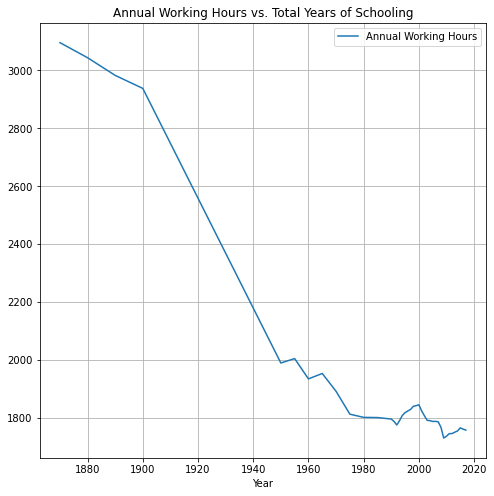

<Figure size 432x288 with 0 Axes>

In [41]:
wh_time_plot = all_data_new.plot(kind="line", x="Year", xlabel="Year", y="Annual Working Hours", grid=True, figsize=(8,8), 
               title="Annual Working Hours vs. Total Years of Schooling")
edu_wh_plot.set_xlabel('Total Years of Schooling')
edu_wh_plot.set_ylabel('Annual Working Hours')
edu_wh_plot.xaxis.get_label().set_visible(True)
edu_wh_plot.yaxis.get_label().set_visible(True)
plt.show()
plt.savefig('wh_time_plot.png')

The regression line equation is: y = -133.39x +3474.69
The correlation coefficient (r) is: -0.9269304430483828
The r-squared is: 0.8592000462498712


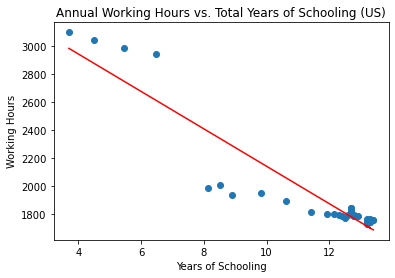

In [48]:
x=all_data_new["Total Years of Schooling"]
y=all_data_new["Annual Working Hours"]
(edu_wh_slope, edu_wh_intercept, edu_wh_rvalue, edu_wh_pvalue, edu_wh_stderr) = linregress(x,y)
regress_values = x * edu_wh_slope + edu_wh_intercept
line_eq = "y = " + str(round(edu_wh_slope,2)) + "x +" + str(round(edu_wh_intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.title("Annual Working Hours vs. Total Years of Schooling (US)")
plt.xlabel("Years of Schooling")
plt.ylabel("Working Hours")
print(f"The regression line equation is: {line_eq}")
print(f"The correlation coefficient (r) is: {edu_wh_rvalue}")
print(f"The r-squared is: {edu_wh_rvalue**2}")
plt.savefig('edu_wh_plot.png')
plt.show()